In [1]:
from datascience import *
%matplotlib inline
path_data = 'data/'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

## Old Faithful
Use Bootstrap sampling to estimate 95% confidence interval on our estimated slope.

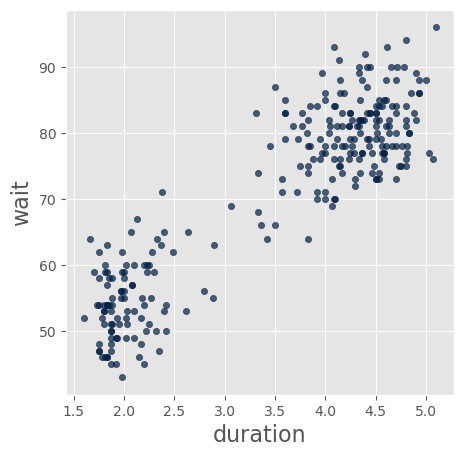

In [2]:
faithful = Table.read_table("../Lab08/faithful-new.csv")
faithful.scatter('duration','wait')

### Regression Tools

In [3]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

### Sample the faithful Table

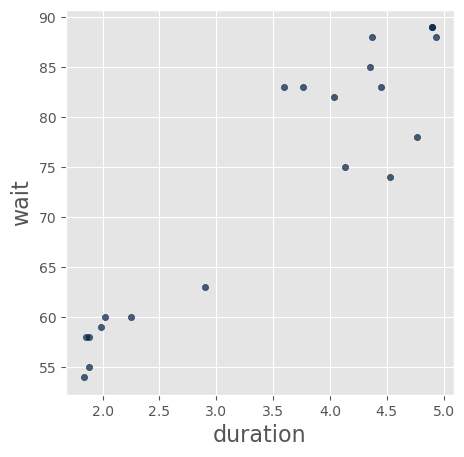

In [4]:
sfaithful = faithful.sample(20) # Try 20 samples
sfaithful.scatter('duration','wait')

Slope: 10.73 Intercept:  33.47


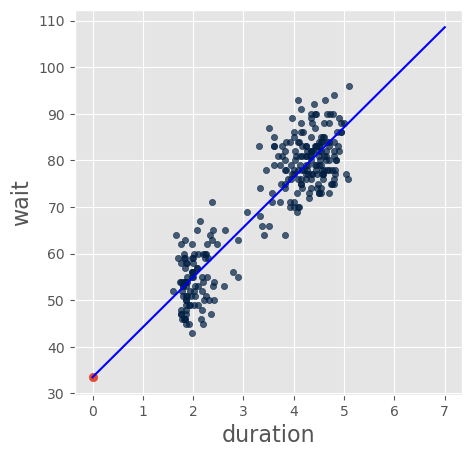

In [27]:
sfaithful = faithful # Resample the whole Table with replacement
sfaithful.scatter('duration','wait')
slp = slope(sfaithful, 'duration','wait')
inter = intercept(sfaithful,'duration','wait')
print("Slope: %4.2f Intercept:  %4.2f" % (slp, inter))
plt.scatter(0,inter)
xs, ys = zip([0, inter], [7, slp*7+inter])
plt.plot(xs,ys, color='blue')


In [7]:
slp = slope(faithful.sample(), 'duration','wait')
print(slp)

10.4712965891


In [11]:
sample_slope = []
for i in np.arange(1000):
    slp = slope(faithful.sample(), 'duration','wait')
    sample_slope.append(slp)   

In [12]:
left = percentile(2.5, sample_slope)
right = percentile(97.5, sample_slope)

make_array(left, right)

array([ 10.16686519,  11.34556619])

In [13]:
slope(faithful, 'duration','wait')

10.729641395133529

### Confidence Interval (95%)

In [16]:
CI = (right - left)/2
CI

0.58935049861608846

95% Confidence Interval on slope: 10.7 +/- 0.6

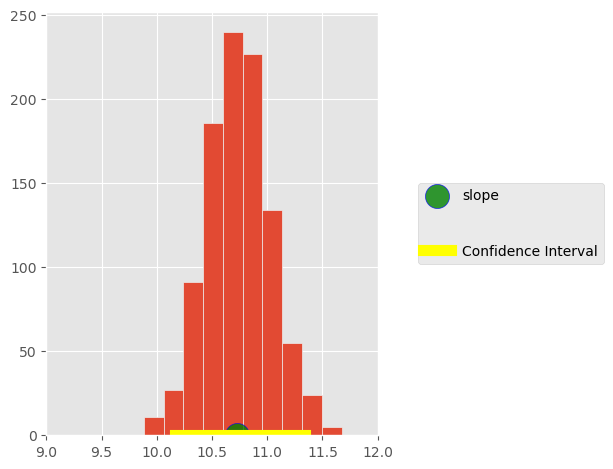

In [24]:
plt.hist(sample_slope)
plt.scatter(10.73,0, s=300, label='slope',marker='o', 
            c='green',alpha=0.8, edgecolors='blue')
plt.plot([left, right], [0, 0], color='yellow', lw=8, label='Confidence Interval')
plt.xlim(9,12)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.tight_layout()

In [30]:
sample_intercept = []
for i in np.arange(1000):
    inter = intercept(faithful.sample(), 'duration','wait')
    sample_intercept.append(inter) 
left = percentile(2.5, sample_intercept)
right = percentile(97.5, sample_intercept)
make_array(left, right)

array([ 31.59302071,  35.6316986 ])

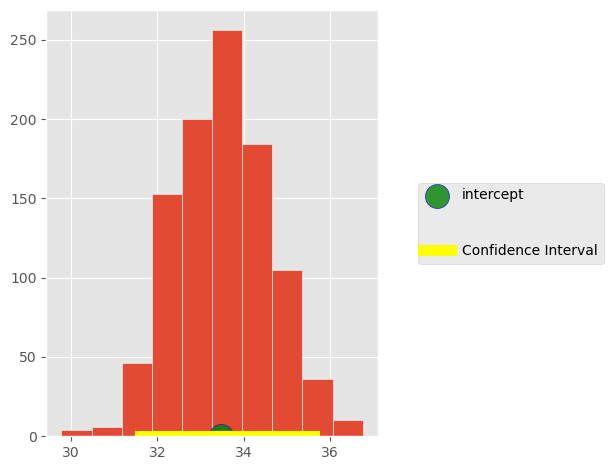

In [31]:
plt.hist(sample_intercept)
plt.scatter(33.47,0, s=300, label='intercept',marker='o', 
            c='green',alpha=0.8, edgecolors='blue')
plt.plot([left, right], [0, 0], color='yellow', lw=8, label='Confidence Interval')
#plt.xlim(30,35)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.tight_layout()

In [33]:
np.mean(faithful['duration'])

3.4877830882352936

## Predict uncertainty in predicted wait at mean of duration, 3.49 minutes.

In [42]:
wait_uncertainty = np.array(sample_slope)*np.mean(faithful['duration'])+np.array(sample_intercept)
left = percentile(2.5, wait_uncertainty)
right = percentile(97.5, wait_uncertainty)
make_array(left, right)
predict = slope(faithful,'duration','wait')*np.mean(faithful['duration'])+intercept(faithful,'duration','wait')

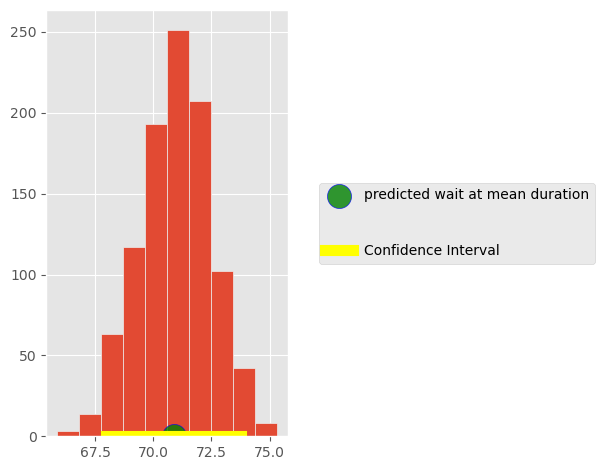

In [44]:
plt.hist(wait_uncertainty)
plt.scatter(predict,0, s=300, label='predicted wait at mean duration',marker='o', 
            c='green',alpha=0.8, edgecolors='blue')
plt.plot([left, right], [0, 0], color='yellow', lw=8, label='Confidence Interval')
#plt.xlim(30,35)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.tight_layout()

In [56]:
import seaborn as sns

<Axes: >

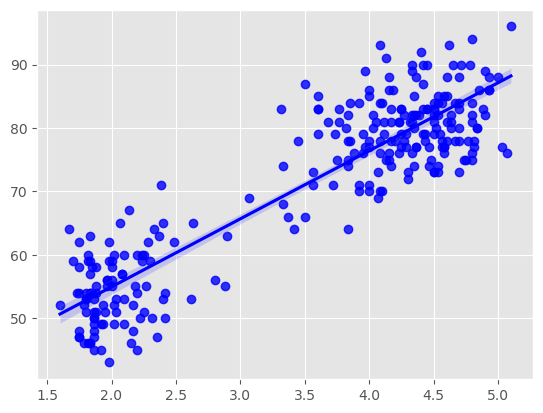

In [60]:
sns.regplot( x=faithful['duration'], y=faithful['wait'], color='blue')

## Comparing Baseline and Post-Treatment Scores: Hodgkins
From [*Inferential Thinking 13.4* ](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html?highlight=hodgkins#comparing-baseline-and-post-treatment-scores)

We will study this in the context of data that are a subset of the information gathered in a randomized controlled trial about treatments for Hodgkin's disease. Hodgkin's disease is a cancer that typically affects young people. The disease is curable but the treatment can be very harsh. The purpose of the trial was to come up with dosage that would cure the cancer but minimize the adverse effects on the patients. 

This table ``hodgkins`` contains data on the effect that the treatment had on the lungs of 22 patients. The columns are:

- Height in cm
- A measure of radiation to the mantle (neck, chest, under arms)
- A measure of chemotherapy
- A score of the health of the lungs at baseline, that is, at the start of the treatment; higher scores correspond to more healthy lungs
- The same score of the health of the lungs, 15 months after treatment

In [2]:
hodgkins = Table.read_table(path_data + 'hodgkins.csv')

In [3]:
hodgkins.show(3)

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33


We will compare the baseline and 15-month scores. As each row corresponds to one patient, we say that the sample of baseline scores and the sample of 15-month scores are *paired* - they are not just two sets of 22 values each, but 22 pairs of values, one for each patient.

At a glance, you can see that the 15-month scores tend to be lower than the baseline scores – the sampled patients' lungs seem to be doing worse 15 months after the treatment. This is confirmed by the mostly positive values in the column `drop`, the amount by which the score dropped from baseline to 15 months.

In [4]:
hodgkins = hodgkins.with_columns(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)

In [5]:
hodgkins

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
168,311,180,98.24,67.62,30.62
173,388,239,129.04,133.33,-4.29
157,370,168,85.41,81.28,4.13
160,468,151,67.94,79.26,-11.32
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
175,529,264,87.45,56.48,30.97
185,392,240,149.84,106.99,42.85
178,479,216,92.24,73.43,18.81


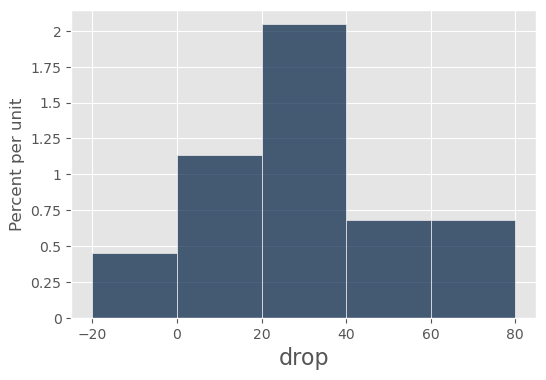

In [6]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [7]:
print("Average: %4.2f" % np.average(hodgkins.column('drop')))

Average: 28.62


In [8]:
np.average(hodgkins.column('drop'))

28.615909090909096

### Average Drop Hypothesis
In the sample, the average drop is about 28.6. But could this be the result of chance variation? <br>The data are from a random sample. Could it be that in the entire population of patients, the average drop is just 0?

To answer this, we can set up two hypotheses:

**Null hypothesis:** In the population, the average drop is 0.

**Alternative hypothesis:** In the population, the average drop is not 0.

To test this hypothesis with a 5% cutoff for the p-value, let's construct an approximate 95% confidence interval for the average drop in the population.

In [9]:
hodgkins.sample()

height,rad,chemo,base,month15,drop
170,341,96,150.51,80.97,69.54
181,539,196,129.75,90.78,38.97
181,539,196,129.75,90.78,38.97
188,238,252,137.43,113.2,24.23
183,259,241,125.02,97.18,27.84
163,453,134,129.88,69.24,60.64
179,376,160,117.43,101.61,15.82
173,388,239,129.04,133.33,-4.29
179,376,160,117.43,101.61,15.82
160,468,151,67.94,79.26,-11.32


In [10]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [11]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

(array([    3.,    54.,   364.,  1357.,  2608.,  2966.,  1854.,   623.,
          159.,    12.]),
 array([ 10.09636364,  13.65668182,  17.217     ,  20.77731818,
         24.33763636,  27.89795455,  31.45827273,  35.01859091,
         38.57890909,  42.13922727,  45.69954545]),
 <BarContainer object of 10 artists>)

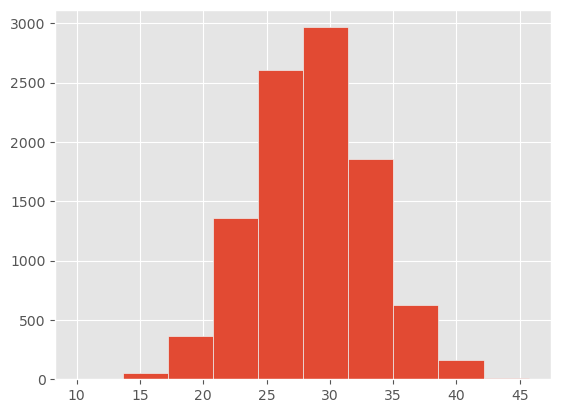

In [12]:
plt.hist(bstrap_means)

### Get the endpoints of the 95% confidence interval
Use Datascience percentile function

In [13]:
percentile(2.5, bstrap_means)

19.71409090909091

In [14]:
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 19.71409091,  37.665     ])

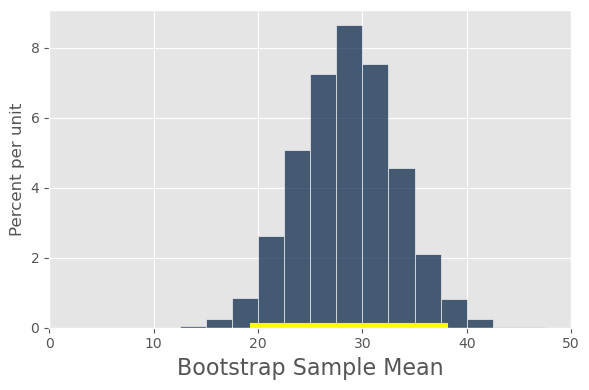

In [15]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=np.arange(0,50,2.5))
plt.plot([left, right], [0, 0], color='yellow', lw=8)
plt.xlim(0,50)
plt.tight_layout()
plt.savefig('bootstrap_CI.png')

The 95% confidence interval for the average drop in the population goes from about 19 to about 40. The interval doesn't contain 0. So we reject the null hypothesis.

But notice that we have done better than simply concluding that the average drop in the population isn't 0. We have estimated how big the average drop is. That's a more useful result than just saying, "It's not 0."

**A note on accuracy:** Our confidence interval is quite wide, for two main reasons:
- The confidence level is high (99%).
- The sample size is relatively small compared to those in our earlier examples.


## Endnote ##
The terminology of a field usually comes from the leading researchers in that field. [Brad Efron](https://en.wikipedia.org/wiki/Bradley_Efron), who first proposed the bootstrap technique, used a term that has [American origins](https://en.wikipedia.org/wiki/Bootstrapping). Not to be outdone, Chinese statisticians have [proposed their own method](http://econpapers.repec.org/article/eeestapro/v_3a37_3ay_3a1998_3ai_3a4_3ap_3a321-329.htm).